# Picks the sample for the IGRINS proposal.
Michael Gully-Santiago  
January-February 2016

### <i class="fa fa-arrow-right fa-1x"></i>   Input:

<i class="fa fa-table fa-2x"></i> 1658 <i class="fa fa-times fa-1x"></i> 60  
<i class="fa fa-file-text fa-2x"></i>
`../analysis/K2C02_YSO_sim_WISE.csv`  

### Output <i class="fa fa-arrow-right fa-1x"></i>   :

<i class="fa fa-list fa-2x"></i> Target list  
<i class="fa fa-bar-chart fa-2x"></i> `K2_selection.pdf`

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina' 
import warnings

### Read in the K2c02 data crossmatched with kplr

In [2]:
k2_simbad = pd.read_csv('../analysis/K2C02_YSO_sim_WISE.csv')
k2_cln_simbad = pd.read_csv('../analysis/K2C02_YSO_CLN_match.csv')

Use the cleaned dataset, but make sure we have WISE data available.

In [3]:
xtra_cols = ['EPIC_ID', 'AllWISE', 'W1mag', 'e_W1mag', 'W2mag', 'e_W2mag', 'W3mag',
       'e_W3mag', 'W4mag', 'e_W4mag']
k2_c2 = pd.merge(k2_cln_simbad, k2_simbad[xtra_cols], how='outer', on=['EPIC_ID'])

# Selection criteria

Main goals:
1. Observable
2. Has sunspots
3. No disk

Selection criteria:
1. H < 10.5
2. K < 10.5
3. Above average level of activity
4. Periodic variability (i.e., not purely stochastic)
5. M or K spectral type
6. Oph or Upper sco.
7. Previously identified as T-Tauri star

In [5]:
vs = k2_c2.OTYPE == 'TTau*'
print("There are {} sources labeled as T-Tauri Stars".format(vs.sum()))

There are 118 sources labeled as T-Tauri Stars


Let's just use the subset of 118 sources for now.  We can expand it later.

In [6]:
k2_c2 = k2_c2[vs]

# Periods

In [8]:
from astroML.time_series import multiterm_periodogram
from astroML.time_series import lomb_scargle

//anaconda/lib/python3.4/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "


We need functions:
1. Returns light curve given EPIC ID
2. Returns ranked peak periods given light curve
3. Determines whether lightcurve is single or double peaked.

Strategy for finding all the maxima: compute second derivative, look for all the concave up regions, compute maximum in each region, sort by maxima.

In [19]:
def light_curve_data(epic_id):
    '''returns the light curve as numpy array, given EPIC ID'''

    ii = k2_c2.index[k2_c2.EPIC_ID == epic_id].values[0]

    file = k2_c2.fname[ii]
    raw_lc = pd.read_csv(file, index_col=False, names=['time', 'flux'], skiprows=1)
    return raw_lc

In [14]:
def run_periodograms(light_curve, P_range=[0.1, 10], samples=10000):
    '''Returns periodograms for hardcoded subset of K2 Cycle 2 lightcurve'''
    x_full = light_curve.time.values
    y_full = light_curve.flux.values

    gi = (x_full > 2065) & (x_full < 2095)

    x, y = x_full[gi], y_full[gi]

    yerr = y*0.001
    
    periods = np.linspace(P_range[0], P_range[1], samples)

    omega = 2.00*np.pi/periods

    P_M = multiterm_periodogram(x, y, yerr, omega)
    P_LS = lomb_scargle(x, y, yerr, omega)
    return (periods, P_M, P_LS)

In [103]:
def plot_LC_and_periodograms(lc, periods, P_M, P_LS):
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    plt.step(lc.time, lc.flux)
    plt.xlim(2065, 2095)
    plt.subplot(122)
    plt.step(periods, P_M, label='Multi-term periodogram')
    plt.step(periods, P_LS, label='Lomb Scargle')
    plt.legend()

In [34]:
def plot_periodograms(periods, P_M, P_LS):
    plt.figure(figsize=(8,8))
    plt.step(periods, P_M, label='Multi-term periodogram')
    plt.step(periods, P_LS, label='Lomb Scargle')
    plt.legend()

In [32]:
lc = light_curve_data(202933888)
periods, P_M, P_LS = run_periodograms(lc)

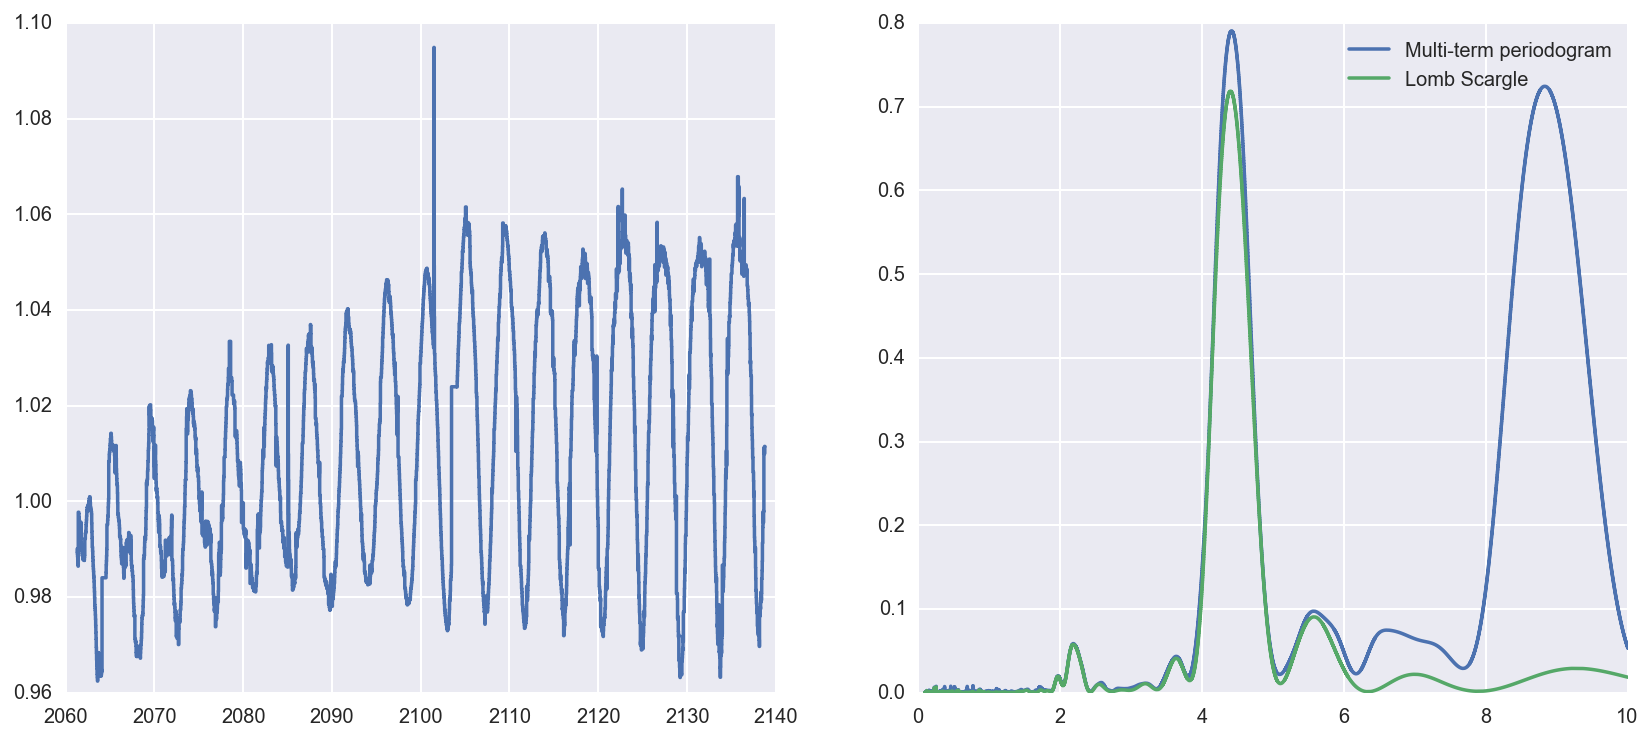

In [41]:
plot_LC_and_periodograms(lc, periods, P_M, P_LS)

## Loop it

In [42]:
epic_ids = k2_c2.EPIC_ID.values

In [45]:
N_sources = len(epic_ids)

In [109]:
i=56

0: 202933888


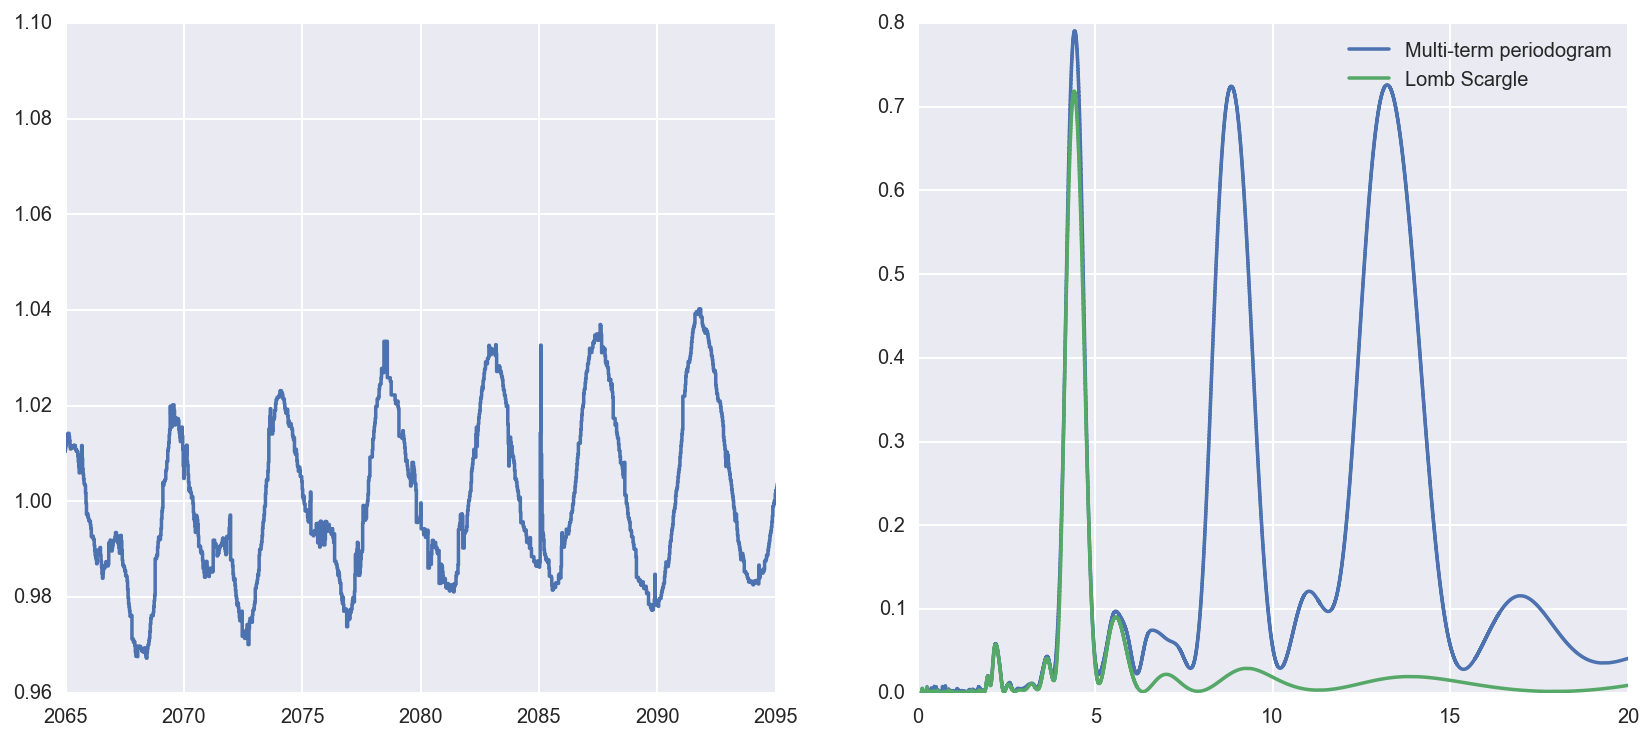

In [110]:
epic_id = epic_ids[i]
lc = light_curve_data(epic_id)
periods, P_M, P_LS = run_periodograms(lc, P_range=[0.1,20])
print("{}: {}".format(i, epic_id))
plot_LC_and_periodograms(lc, periods, P_M, P_LS)
i+=1

In [99]:
import scipy

In [100]:
scipy.gradient()

TypeError: gradient() missing 1 required positional argument: 'f'

In [ ]:
scipy.zerosb

In [ ]:
np.zero

In [ ]:
scipy.zeros()

In [ ]:
scipy.optimize.approx_fprime()

In [ ]:
scipy.optimize.root()

In [ ]:
scipy.

In [ ]:
scipy.optimize.basinhopping()

In [38]:
x_full = raw_lc['BJD - 2454833'].values
y_full = raw_lc[' Corrected Flux'].values

gi = (x_full > 2065) & (x_full < 2095)

x, y = x_full[gi], y_full[gi]

yerr = y*0.001

In [39]:
periods = np.linspace(0.1, 7.0, 10000)

omega = 2.00*np.pi/periods

P_M = multiterm_periodogram(x, y, yerr, omega)
P_LS = lomb_scargle(x, y, yerr, omega)

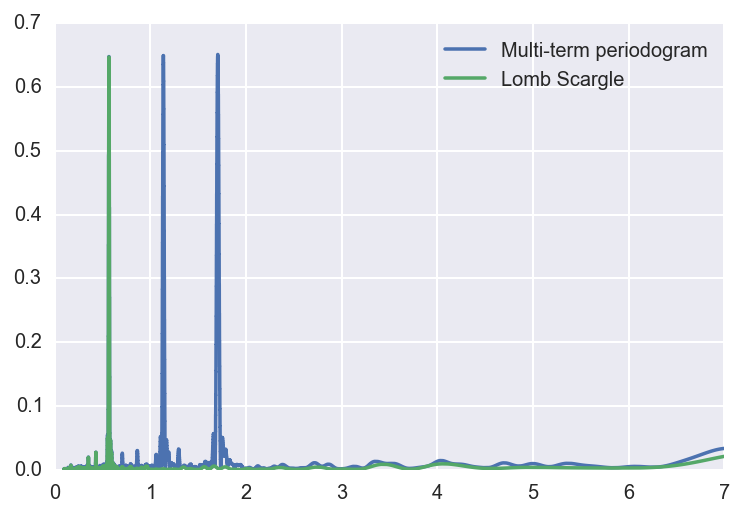

In [41]:
P_coarse_fit = periods[np.argmax(P_LS)]

In [42]:
periods = np.linspace(P_coarse_fit*0.8, P_coarse_fit*1.2, 10000)

omega = 2.00*np.pi/periods

P_M = multiterm_periodogram(x, y, yerr, omega)
P_LS = lomb_scargle(x, y, yerr, omega)

In [43]:
P_fit = periods[np.argmax(P_LS)]

In [44]:
P_fit

0.56881841799541488

# Linear regression example

$y = c_0 + c_1 \cdot x + c_2 \cdot \sin{\frac{2\pi x}{P}} + c_3 \cdot \cos{\frac{2\pi x}{P}} $

We have four coefficients: $c_1, c_2, c_3, c_4$

In [45]:
sin_vector = np.sin(2.0*np.pi*x/P_fit)
cos_vector = np.cos(2.0*np.pi*x/P_fit)

In [60]:
A = np.concatenate((np.expand_dims(cos_vector, 1),
                    np.expand_dims(sin_vector, 1),
                    np.vander(x, 1)), axis=1)

In [61]:
ATA = np.dot(A.T, A / yerr[:, None]**2)
sigma_w = np.linalg.inv(ATA)
mean_w = np.linalg.solve(ATA, np.dot(A.T, y/yerr**2))

In [62]:
yfit = np.matmul(mean_w, A.T)

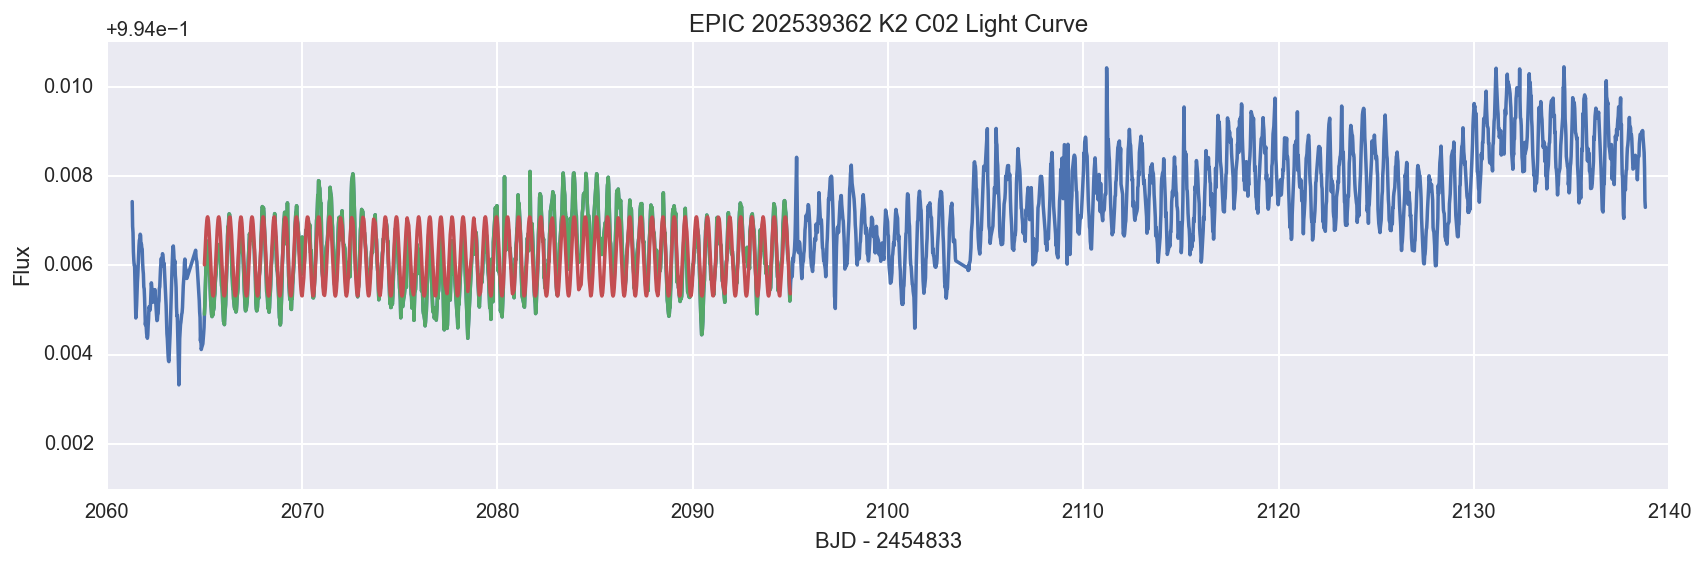

In [63]:
this_cand = 202539362

ii = k2_c2.index[k2_c2.EPIC_ID == this_cand].values[0]

plt.figure(figsize=(14, 4))
file = k2_c2.fname[ii]
raw_lc = pd.read_csv(file, index_col=False)

plt.plot(raw_lc['BJD - 2454833'], raw_lc[' Corrected Flux'])

plt.plot(x, y)
plt.plot(x, yfit)

#plt.ylim(0.95, 1.005)
plt.ylim(0.995, 1.005)
plt.title("EPIC {} K2 C02 Light Curve".format(k2_c2.EPIC_ID[ii]))
plt.xlabel('BJD - 2454833')
plt.ylabel('Flux');

In [52]:
from sklearn import cross_validation

In [65]:
def lin_regress(A, y, yerr):
    ATA = np.dot(A.T, A / yerr[:, None]**2)
    sigma_w = np.linalg.inv(ATA)
    mean_w = np.linalg.solve(ATA, np.dot(A.T, y/yerr**2))
    return mean_w

In [66]:
polys = np.arange(1, 50)
net_scores = np.zeros(len(polys))
n_folds = 10

In [67]:
j = 0
for n_poly in polys:

    X = np.concatenate((np.expand_dims(cos_vector, 1),
                        np.expand_dims(sin_vector, 1),
                        np.vander(x, n_poly)), axis=1)
    n, n_dim = X.shape
    scores_test = np.zeros(n_folds)

    kf = cross_validation.KFold(n, n_folds=n_folds)
    i = 0
    for train_index, test_index in kf:
        #print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_train_err, y_test_err = yerr[train_index], yerr[test_index]
        w_train = lin_regress(X_train, y_train, y_train_err)
        y_test_fit = np.matmul(w_train, X_test.T)
        resid = np.sqrt(np.sum(((y_test-y_test_fit)/y_test_err)**2))
        scores_test[i] = resid
        i += 1
    net_scores[j] = np.mean(scores_test)
    j += 1

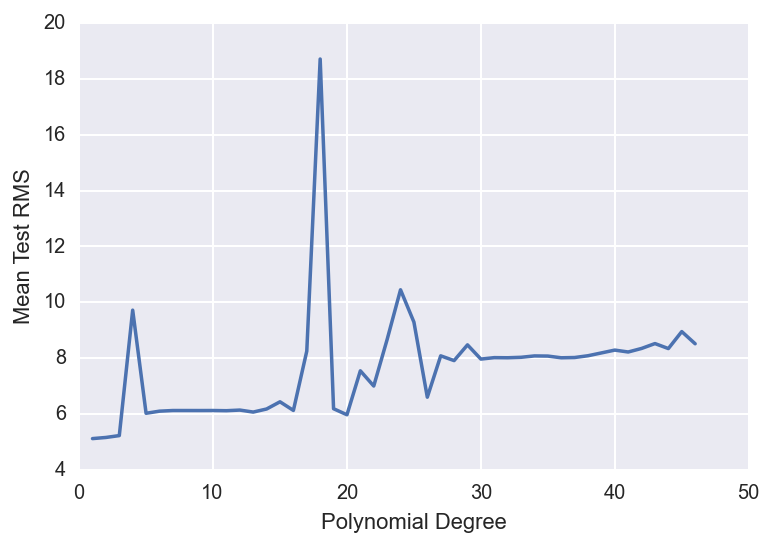

In [68]:
plt.plot(polys, net_scores)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Test RMS')

## Determine the amplitudes

In [32]:
opt_poly = polys[np.argmin(net_scores)]

4

In [33]:
A = np.concatenate((np.expand_dims(cos_vector, 1),
                    np.expand_dims(sin_vector, 1),
                    np.vander(x, opt_poly)), axis=1)

In [34]:
ATA = np.dot(A.T, A / yerr[:, None]**2)
sigma_w = np.linalg.inv(ATA)
mean_w = np.linalg.solve(ATA, np.dot(A.T, y/yerr**2))

In [41]:
#sns.heatmap(np.log10(sigma_w), annot=True)

In [35]:
mean_w

array([ -9.60454334e-03,   1.86361236e-02,  -7.84097253e-06,
         4.89469845e-02,  -1.01848993e+02,   7.06428927e+04])

In [45]:
n_dim, = mean_w.shape

The first two are A and B.

In [51]:
np.sqrt(mean_w[0]**2 + mean_w[1]**2)

0.020965503960862358

The end for now.